## Fuel Economy Investigation

### Investigate fuel economy data provided by the EPA
Source: https://www.fueleconomy.gov/feg/download.shtml/EPAGreenGuide/

##### Questions

- How much has vehicle classes improved in fuel economy?
- What are characteristics of SmartWay vehicles?
- What features are associated with better fuel economy? 

##### Wrangle - Gather &  Assess Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df08 = pd.read_csv('all_alpha_08.csv')
df18 = pd.read_csv('all_alpha_18.csv')

In [4]:
df08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [7]:
df18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [8]:
# Understanding the data:
# - Display = engine displacement in L
# - Trans = transmission type plus number of gears
# - Stand = vehical emissions standard code
# - Underhood ID = engine family or test group ID
# - SmartWay Score = based on greenhouse gas and air pollution score

In [14]:
# Number of samples, number of columns 

print(df08.shape, df18.shape)

(2404, 18) (1611, 18)


In [19]:
# Duplicated rows?

print(df08.duplicated().sum(), df18.duplicated().sum())

25 0


In [18]:
# Datatypes

df08.info()
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [22]:
# Features with missing values?

print(df08.isnull().sum(), df18.isnull().sum())

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64 Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64


In [27]:
# Number of non-null unique values

print(df08.nunique(), df18.nunique())

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64 Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO

In [41]:
# What types are fuels are there?

print("2008 Fuel Types: {} \n2018 Fuel Types: {}".format(df08.Fuel.unique(), df18.Fuel.unique()))

2008 Fuel Types: ['Gasoline' 'ethanol/gas' 'ethanol' 'diesel' 'CNG'] 
2018 Fuel Types: ['Gasoline' 'Gasoline/Electricity' 'Diesel' 'Ethanol/Gas' 'Electricity']


##### Wrangle - Clean Data

In [43]:
# Drop columns that are not consistent in both datasets

# From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'
# From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

df08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)
df18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

In [53]:
df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [56]:
df18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [57]:
# Rename columns for consistency

df08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [58]:
# Replace spaces with underscores and convert everything to lowercase

df08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

df08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [59]:
df18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

df18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [61]:
# Confirm columns match?

df08.columns == df18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [62]:
# Only compare CA standards

df08ca = df08.query('cert_region == "CA"')
df18ca = df18.query('cert_region == "CA"')

In [64]:
print(df08ca.shape, df18ca.shape)

(1084, 14) (798, 14)


In [ ]:
# Drop the cert_region column as every datapoint will only be in CA

df08ca.drop(df08['cert_region'], axis=1, inplace=True)
df18ca.drop(df18['cert_region'], axis=1, inplace=True)

In [68]:
print(df08ca.shape, df18ca.shape)

(1084, 13) (798, 13)


In [70]:
df08ca.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


In [72]:
# Drop Nulls (rows with missing data)

df08ca.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [73]:
df18ca.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [78]:
df08ca.dropna(inplace=True)
df18ca.dropna(inplace=True)

print(df08ca.shape, df18ca.shape)
print(df08.shape, df18.shape)

(986, 13) (794, 13)
(2404, 14) (1611, 14)


In [76]:
# Dedupe - drop duplicate rows

df08ca.drop_duplicates(inplace=True)
df18ca.drop_duplicates(inplace=True)

print(df08ca.shape, df18ca.shape)

(986, 13) (794, 13)


In [77]:
df08ca.to_csv('ca_08.csv', index=False)
df18ca.to_csv('ca_18.csv', index=False)

**Fixing Data Types**

1) Need to extract int values from the strings in the 2008 cyl column and convert floats to ints in the 2018 cyl column to make the cyl column in both dataset clear and consistent.

2) For air_pollution_score column: Need to convert strings to floats in the 2008 column and convert ints to floats in the 2018 columns.

3) The following features need to be convereted to floats from strings for both dataset:
city_mpg
hwy_mpg
cmb_mpg

4) Need to convert string to ints in the 2008 column to make the greenhouse_gas_score columns in both datasets consistent.

In [80]:
df08 = pd.read_csv('ca_08.csv')
df18 = pd.read_csv('ca_18.csv')

In [81]:
df08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


In [82]:
df18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No


In [83]:
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 100.3+ KB


In [84]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    float64
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   veh_class             794 non-null    object 
 7   air_pollution_score   794 non-null    int64  
 8   city_mpg              794 non-null    object 
 9   hwy_mpg               794 non-null    object 
 10  cmb_mpg               794 non-null    object 
 11  greenhouse_gas_score  794 non-null    int64  
 12  smartway              794 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 80.8+ KB


In [85]:
# Fix cyl column

df08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [90]:
df08['cyl'] = df08['cyl'].str.replace("(", "")
df08['cyl'] = df08['cyl'].str.replace(")", "")
df08['cyl'] = df08['cyl'].str.replace("cyl", "")

/var/folders/qj/6gkknfkn4gd_jvl8dr9l2vg40000gp/T/ipykernel_3355/842371772.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df08['cyl'] = df08['cyl'].str.replace("(", "")
/var/folders/qj/6gkknfkn4gd_jvl8dr9l2vg40000gp/T/ipykernel_3355/842371772.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df08['cyl'] = df08['cyl'].str.replace(")", "")


In [91]:
df08['cyl'].value_counts()

6      409
4      283
8      199
5       48
12      30
10      14
2        2
16       1
Name: cyl, dtype: int64

In [92]:
# Make 2018 into int

df18['cyl'] = df18['cyl'].astype(int)

In [93]:
df18['cyl'].value_counts()

4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

In [95]:
# Fix air pollution datatype

df08['air_pollution_score'].value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

In [96]:
df08['air_pollution_score'] = df08['air_pollution_score'].astype(float)

ValueError: could not convert string to float: '6/4'

In [99]:
# 6/4 could not be converted into a float 

error = df08.query('air_pollution_score == "6/4"')
print(error)

                  model  displ cyl    trans drive         fuel  veh_class  \
582  MERCEDES-BENZ C300    3.0  6   Auto-L7   2WD  ethanol/gas  small car   

    air_pollution_score city_mpg hwy_mpg cmb_mpg greenhouse_gas_score smartway  
582                 6/4    13/18   19/25   15/21                  7/6       no  


In [100]:
df08.iloc[582]

model                   MERCEDES-BENZ C300
displ                                  3.0
cyl                                     6 
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 582, dtype: object

"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."

So all vehicles that are hybrids will have two values listed, like the one above

The solution would be to give each of these values separate rows

In [101]:
# Find all hybrids in dataset 

hb08 = df08[df08['fuel'].str.contains('/')]
hb08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [104]:
hb18 = df18[df18['fuel'].str.contains('/')]
hb18.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


In [105]:
# Create new rows for the hybrid cars

df1 = hb08.copy() # create a df to hold first fuel type
df2 = hb08.copy() # create a df to hold second fuel type

In [108]:
# split the columns

split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for i in split_columns:
    df1[i] = df1[i].apply(lambda x: x.split("/")[0])
    df2[i] = df2[i].apply(lambda x: x.split("/")[1])

In [109]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [110]:
new_rows = df1.append(df2)
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [112]:
# Drop original rows

df08.drop(hb08.index, inplace=True) # find the rows that are in hb08 and drop them from df08

KeyError: '[582] not found in axis'

In [116]:
df08 = df08.append(new_rows, ignore_index=True) 

In [117]:
df08.shape

(987, 13)

In [120]:
hb18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes


In [118]:
# Repeat for 2018 Dataset

df1 = hb18.copy()
df2 = hb18.copy()

In [121]:
# Split columns

split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for i in split_columns:
    df1[i] = df1[i].apply(lambda x: x.split("/")[0])
    df2[i] = df2[i].apply(lambda x: x.split("/")[1])

In [126]:
# Join the two dfs

new_rows = df1.append(df2)
new_rows.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No


In [124]:
# Drop hybrid rows in original hb18 df

df18.drop(hb18.index, inplace=True)

KeyError: '[ 52  78  79  92 189 195 196 197 212 214 216 218 225 226 227 229 244 246\n 300 326 327 328 345 347 351 354 442 444 462 571 578 584 616 742 747 777\n 789 793] not found in axis'

In [125]:
# Add new_rows to original df18

df18 = df18.append(new_rows, ignore_index = True)

In [128]:
df18.shape

(832, 13)

In [129]:
# Fix air pollution datatype

df08['air_pollution_score'].value_counts()

6      501
7      398
9.5     80
9        7
4        1
Name: air_pollution_score, dtype: int64

In [130]:
df08['air_pollution_score'] = df08['air_pollution_score'].astype(float)
df18['air_pollution_score'] = df18['air_pollution_score'].astype(float)

In [131]:
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    object 
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    object 
 9   hwy_mpg               987 non-null    object 
 10  cmb_mpg               987 non-null    object 
 11  greenhouse_gas_score  987 non-null    object 
 12  smartway              987 non-null    object 
dtypes: float64(2), object(11)
memory usage: 100.4+ KB


In [132]:
# Convert city_mpg, hwy_mpg, cmb_mpg from string to float

convert = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

for i in convert:
    df08[i] = df08[i].astype(float)
    df18[i] = df18[i].astype(float)

In [133]:
# Convert greenhouse_gas_score from float to int

df08['greenhouse_gas_score'] = df08['greenhouse_gas_score'].astype(int)

In [134]:
# Double check all data types

df08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [135]:
df18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [136]:
df08.dtypes == df18.dtypes

model                    True
displ                    True
cyl                     False
trans                    True
drive                    True
fuel                     True
veh_class                True
air_pollution_score      True
city_mpg                 True
hwy_mpg                  True
cmb_mpg                  True
greenhouse_gas_score     True
smartway                 True
dtype: bool

In [137]:
df08['cyl'] = df08['cyl'].astype(int)

In [138]:
df08.dtypes == df18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [140]:
# Save the clean datasets

df08.to_csv('clean_08.csv', index=False)
df18.to_csv('clean_18.csv', index=False)

#### Explore

In [141]:
df08 = pd.read_csv('clean_08.csv')
df18 = pd.read_csv('clean_18.csv')

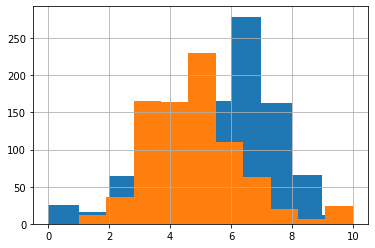

In [148]:
df08['greenhouse_gas_score'].hist()
df18['greenhouse_gas_score'].hist();

# Distributions for 2008 is more skewed to the left. Greenhouse gas scores were higher in 2008 vs 2018.

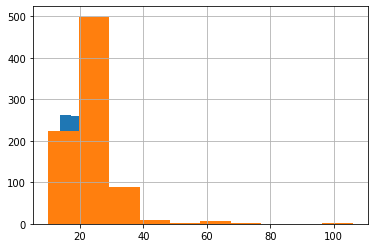

In [149]:
df08['cmb_mpg'].hist();
df18['cmb_mpg'].hist();

# Combined mpg became much more skewed to the right in 2018

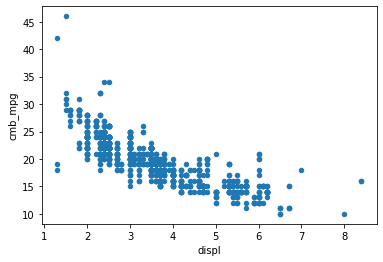

In [153]:
# Describe the correlation between displacement and combined mpg

df08.plot.scatter('displ', 'cmb_mpg'); # negative correlation

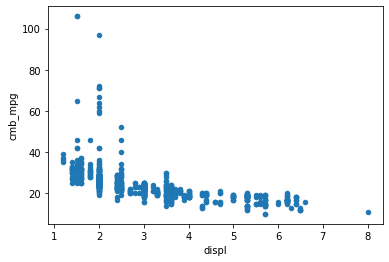

In [154]:
df18.plot.scatter('displ', 'cmb_mpg');

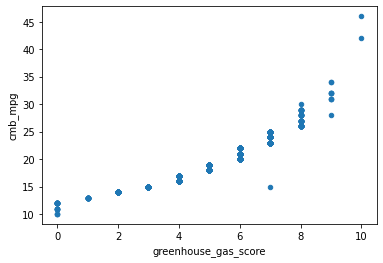

In [156]:
# Describe the correlation between greenhouse gas score and combined mpg.

df08.plot.scatter('greenhouse_gas_score', 'cmb_mpg'); # positive correlation

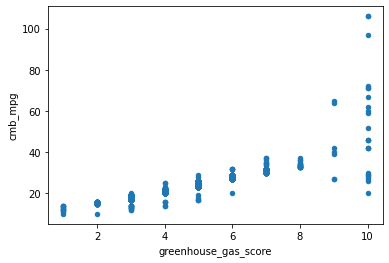

In [157]:
df18.plot.scatter('greenhouse_gas_score', 'cmb_mpg');

In [165]:
# Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

print("2008:", df08['fuel'].unique())
print("2018:", df18['fuel'].unique())

2008: ['Gasoline' 'CNG' 'ethanol' 'gas']
2018: ['Gasoline' 'Diesel' 'Ethanol' 'Electricity' 'Gas']


In [166]:
df08['fuel'].value_counts() # CNG and ethanol are alternative fuels

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [168]:
df18.fuel.value_counts() # ethanol and electricity are alternative fuels

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [170]:
alt08 = df08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt08

2

In [171]:
alt18 = df18.query('fuel in ["Electricity", "Ethanol"]').model.nunique()
alt18

26

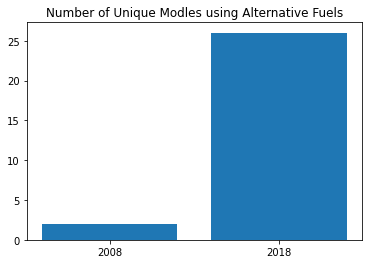

In [175]:
plt.bar(["2008", "2018"], [alt08, alt18]);
plt.title("Number of Unique Modles using Alternative Fuels");

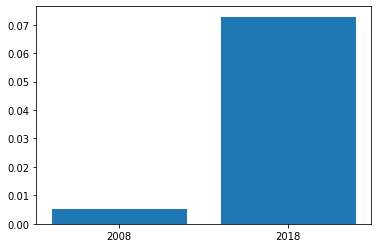

In [189]:
# What about proportions?

totals08 = df08.model.nunique()
totals18 = df18.model.nunique()

prop08 = alt08 / totals08
prop18 = alt18 / totals18

plt.bar(["2008", "2018"], [prop08, prop18]);

In [192]:
# Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?

veh08 = df08.groupby('veh_class').cmb_mpg.mean()
veh08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [193]:
veh18 = df18.groupby('veh_class').cmb_mpg.mean()
veh18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [194]:
increase = veh18 - veh08
increase

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

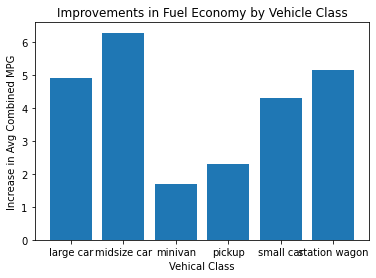

In [199]:
increase.dropna(inplace=True)
plt.bar(increase.index, increase);
plt.xlabel("Vehical Class")
plt.ylabel("Increase in Avg Combined MPG")
plt.title("Improvements in Fuel Economy by Vehicle Class");

In [200]:
# Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

df08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [203]:
smart08 = df08.query('smartway == "yes"')

smart08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [205]:
df18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [208]:
smart18 = df18.query('smartway in ["Yes", "Elite"]')

smart18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


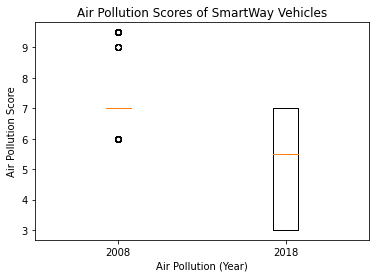

In [223]:
air_pollution08 = smart08["air_pollution_score"]
air_pollution18 = smart18["air_pollution_score"]

columns = [air_pollution08, air_pollution18]

fix, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1,2],["2008", "2018"])
plt.xlabel("Air Pollution (Year)")
plt.ylabel("Air Pollution Score")
plt.title("Air Pollution Scores of SmartWay Vehicles")
plt.show()

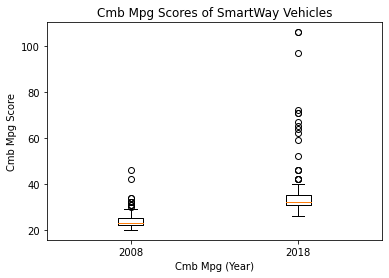

In [233]:
cmb_mpg08 = smart08["cmb_mpg"]
cmb_mpg18 = smart18["cmb_mpg"]

columns = [cmb_mpg08, cmb_mpg18]

fix, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1,2],["2008", "2018"])
plt.xlabel("Cmb Mpg (Year)")
plt.ylabel("Cmb Mpg Score")
plt.title("Cmb Mpg Scores of SmartWay Vehicles")
plt.show()

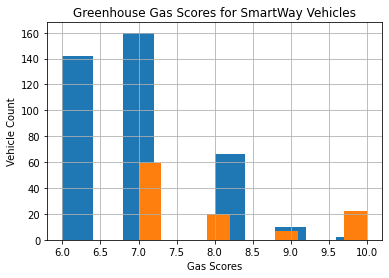

In [238]:
smart08['greenhouse_gas_score'].hist();
smart18['greenhouse_gas_score'].hist();
plt.xlabel("Gas Scores")
plt.ylabel("Vehicle Count")
plt.title("Greenhouse Gas Scores for SmartWay Vehicles");

In [239]:
# Q4: What features are associated with better fuel economy (mpg)?

top08 = df08.query('cmb_mpg > cmb_mpg.mean()')
top08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [240]:
top18 = df18.query('cmb_mpg > cmb_mpg.mean()')
top18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [241]:
# Q5: For all of the models that were produced in 2008 that are still being produced in 2018, 
# how much has the mpg improved and which vehicle improved the most?

# This question requies merging the datasets to compare models that exist in both datasets

In [242]:
# Rename 2008 columns to distinguish 2018 columns after the merge

df08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [243]:
df08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [244]:
# Perform inner merge

combined = df08.merge(df18, left_on="model_2008", right_on="model", how="inner")

In [245]:
combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [246]:
combined.to_csv('combined.csv', index=False)

In [253]:
# 5a. Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 

model_mpg = combined.groupby(['model'])['cmb_mpg_2008', 'cmb_mpg'].mean()

model_mpg.head()

/var/folders/qj/6gkknfkn4gd_jvl8dr9l2vg40000gp/T/ipykernel_3355/981426138.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  model_mpg = combined.groupby(['model'])['cmb_mpg_2008', 'cmb_mpg'].mean()


,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [254]:
# 5b. Create a new column, mpg_change, with the change in mpg

model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [255]:
# 5c. Find the vehicle that improved the most

model_mpg.sort_values(by='mpg_change', ascending=False)

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.200000,16.533333
CHEVROLET Malibu,22.333333,33.000000,10.666667
CHEVROLET Equinox,19.000000,27.833333,8.833333
AUDI S4,15.500000,24.000000,8.500000
AUDI S5,16.000000,24.000000,8.000000
...,...,...,...
TOYOTA Tundra,15.400000,15.250000,-0.150000
CHEVROLET Corvette,18.000000,17.750000,-0.250000
TOYOTA Sequoia,14.750000,14.500000,-0.250000
